In [7]:
# Question 1 - Extracting Tesla Stock Data Using yfinance
import yfinance as yf

# Get Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_stock = tesla.history(period="max")

# Print the stock data
print(tesla_stock.head())

                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


In [1]:
# Question 2 - Extracting Tesla Revenue Data Using Webscraping
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

# Find the script tag with the revenue data
script_tag = soup.find("script", text=lambda text: text and "var data" in text)

if script_tag:
    # Extract the revenue data from the script tag
    data_start = script_tag.text.find("var data =") + len("var data =")
    data_end = script_tag.text.find("var ");
    revenue_data_str = script_tag.text[data_start:data_end].strip()
    revenue_data = eval(revenue_data_str)

    # Convert the revenue data to a pandas DataFrame
    tesla_revenue = pd.DataFrame(revenue_data, columns=["date", "revenue"])
    tesla_revenue["revenue"] = tesla_revenue["revenue"].str.replace(",", "").astype(float)
    print(tesla_revenue)
else:
    print("Revenue data not found on the webpage.")

Revenue data not found on the webpage.


/tmp/ipykernel_1686/1392536093.py:11: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  script_tag = soup.find("script", text=lambda text: text and "var data" in text)


In [2]:
# Question 3 - Extracting GameStop Stock Data Using yfinance
import yfinance as yf

# Get GameStop stock data
gamestop = yf.Ticker("GME")
gamestop_stock = gamestop.history(period="max")

# Print the stock data
print(gamestop_stock.head())

                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716073  1.670626  1.683250  11021600   
2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  


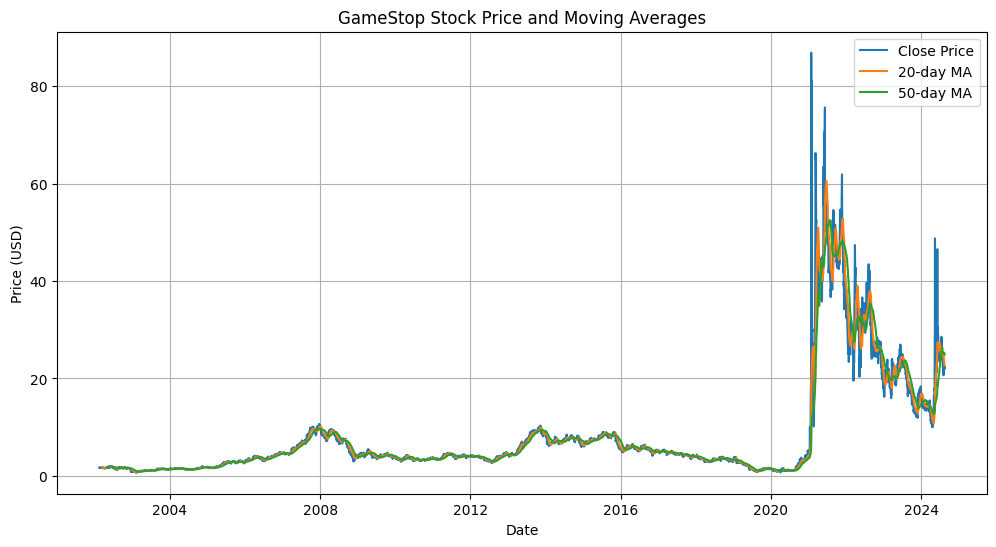

Daily Returns Statistics:
count    5665.000000
mean        0.001719
std         0.053400
min        -0.600000
25%        -0.016074
50%         0.000000
75%         0.016256
max         1.348358
Name: Returns, dtype: float64


In [3]:
# Question 4 - Analyzing GameStop Stock Data
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Get GameStop stock data
gamestop = yf.Ticker("GME")
gamestop_stock = gamestop.history(period="max")

# Calculate the daily returns
gamestop_stock["Returns"] = gamestop_stock["Close"].pct_change()

# Calculate the 20-day moving average
gamestop_stock["MA20"] = gamestop_stock["Close"].rolling(window=20).mean()

# Calculate the 50-day moving average
gamestop_stock["MA50"] = gamestop_stock["Close"].rolling(window=50).mean()

# Plot the stock price, 20-day and 50-day moving averages
plt.figure(figsize=(12, 6))
plt.plot(gamestop_stock.index, gamestop_stock["Close"], label="Close Price")
plt.plot(gamestop_stock.index, gamestop_stock["MA20"], label="20-day MA")
plt.plot(gamestop_stock.index, gamestop_stock["MA50"], label="50-day MA")
plt.title("GameStop Stock Price and Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid()
plt.show()

# Analyze the daily returns
print("Daily Returns Statistics:")
print(gamestop_stock["Returns"].describe())


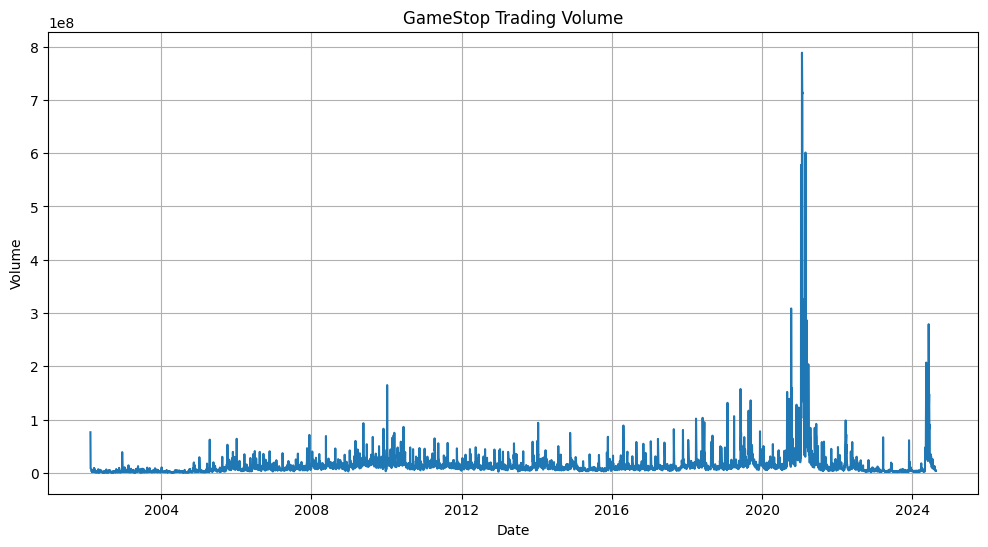

Trading Volume Statistics:
count    5.666000e+03
mean     1.450544e+07
std      2.976882e+07
min      2.600000e+05
25%      5.393500e+06
50%      9.609400e+06
75%      1.516050e+07
max      7.886316e+08
Name: Volume, dtype: float64


In [4]:
# Question 5 - Analyzing GameStop Trading Volume
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Get GameStop stock data
gamestop = yf.Ticker("GME")
gamestop_stock = gamestop.history(period="max")

# Calculate the daily trading volume
gamestop_stock["Volume"] = gamestop_stock["Volume"].astype(int)

# Plot the trading volume
plt.figure(figsize=(12, 6))
plt.plot(gamestop_stock.index, gamestop_stock["Volume"])
plt.title("GameStop Trading Volume")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.grid()
plt.show()

# Analyze the trading volume statistics
print("Trading Volume Statistics:")
print(gamestop_stock["Volume"].describe())

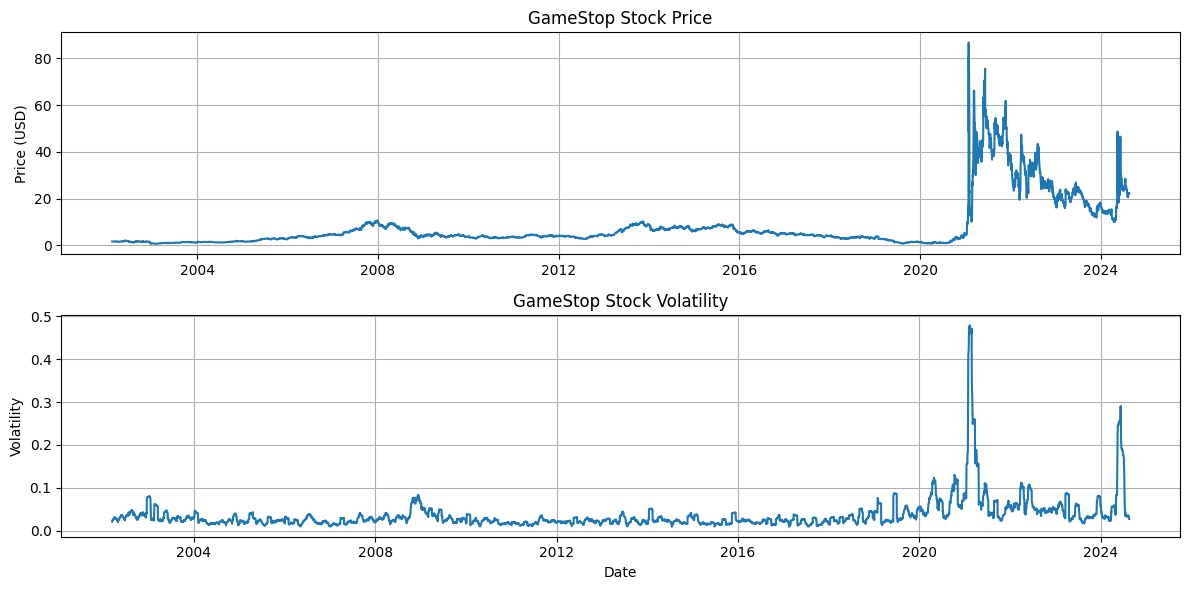

GameStop Stock Volatility Statistics:
count    5646.000000
mean        0.036106
std         0.038993
min         0.009234
25%         0.019729
50%         0.026015
75%         0.037628
max         0.479543
Name: Volatility, dtype: float64


In [5]:
# Question 6 - Analyzing GameStop Stock Volatility
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Get GameStop stock data
gamestop = yf.Ticker("GME")
gamestop_stock = gamestop.history(period="max")

# Calculate the daily returns
gamestop_stock["Returns"] = gamestop_stock["Close"].pct_change()

# Calculate the rolling standard deviation of daily returns (volatility)
gamestop_stock["Volatility"] = gamestop_stock["Returns"].rolling(window=20).std()

# Plot the stock price and volatility
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(2, 1, 1)
plt.plot(gamestop_stock.index, gamestop_stock["Close"])
plt.title("GameStop Stock Price")
plt.ylabel("Price (USD)")
plt.grid()

ax2 = plt.subplot(2, 1, 2)
plt.plot(gamestop_stock.index, gamestop_stock["Volatility"])
plt.title("GameStop Stock Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.grid()
plt.tight_layout()
plt.show()

# Analyze the stock volatility
print("GameStop Stock Volatility Statistics:")
print(gamestop_stock["Volatility"].describe())